# StackOverflow, preprocessing

This notebook analyzes the distribution of StackOverflow tags and assigns ground-truth classes to items.

Follow the instructions under `script/README.md` to download and pre-process the raw dataset.

In [1]:
import collabclass
import collections
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
with open("../_data/stackoverflow/workspace.pkl", "rb") as f:
    data = pickle.load(f)
qs = data["questions"]
edges = data["edges"]

In [3]:
counter = collections.Counter()

for x in qs.values():
    for t in x["tags"]:
        counter[t] += 1

In [4]:
for tag, cnt in counter.most_common(n=30):
    print(f'"{tag}",  # {cnt:,}')

"java",  # 129,666
"c#",  # 122,598
"javascript",  # 114,580
"python",  # 108,494
"android",  # 102,061
"c++",  # 76,305
"php",  # 56,859
"ios",  # 55,215
"html",  # 48,076
"jquery",  # 46,467
".net",  # 42,898
"css",  # 38,241
"c",  # 30,974
"objective-c",  # 27,425
"r",  # 26,176
"sql",  # 25,811
"ruby-on-rails",  # 25,326
"iphone",  # 23,861
"mysql",  # 23,691
"node.js",  # 22,269
"asp.net",  # 22,186
"ruby",  # 20,313
"swift",  # 19,095
"git",  # 18,877
"linux",  # 18,255
"django",  # 17,381
"sql-server",  # 16,617
"arrays",  # 16,039
"asp.net-mvc",  # 15,831
"angularjs",  # 15,815


In [5]:
selection = (
    "java",
    "c#",
    "javascript",
    "python",
    "c++",
    "php",
    "ios",
    "r",
    "sql",
    "ruby-on-rails",
)
tag2idx = {tag: idx for idx, tag in enumerate(selection)}

In [6]:
vecs = list()
for x in qs.values():
    vec = np.zeros(len(selection))
    for t in x["tags"]:
        if t not in tag2idx:
            continue
        vec[tag2idx[t]] = 1
    vecs.append(vec)
vecs = np.array(vecs)

In [7]:
mat = np.dot(vecs.T, vecs)
mat /= np.diag(mat)
#mat = np.corrcoef(vecs, rowvar=False)
with np.printoptions(precision=2, suppress=True):
    print(mat)

[[1.   0.01 0.01 0.01 0.01 0.01 0.   0.   0.03 0.  ]
 [0.01 1.   0.01 0.   0.02 0.   0.   0.   0.06 0.  ]
 [0.01 0.01 1.   0.01 0.   0.05 0.02 0.   0.   0.03]
 [0.   0.   0.01 1.   0.01 0.01 0.   0.02 0.02 0.  ]
 [0.01 0.01 0.   0.01 1.   0.   0.   0.01 0.   0.  ]
 [0.   0.   0.02 0.   0.   1.   0.   0.   0.04 0.  ]
 [0.   0.   0.01 0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.01 0.01 0.   0.   0.   0.02 0.   0.   1.   0.01]
 [0.   0.   0.01 0.   0.   0.   0.   0.   0.01 1.  ]]


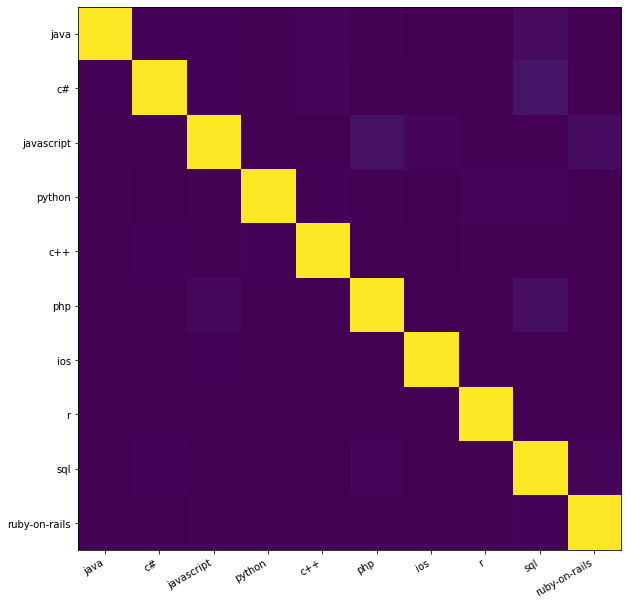

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(mat)
ax.set_xticks(np.arange(len(selection)))
ax.set_xticklabels(selection, rotation="30", ha="right")
ax.set_yticks(np.arange(len(selection)))
ax.set_yticklabels(selection);

## Save final class assignment

In [9]:
final = dict()
for pid, x in qs.items():
    tags = list(t for t in x["tags"] if t in tag2idx)
    if len(tags) == 1:
        final[pid] = tags[0]
len(final)

704982

In [10]:
%%time
with open("../_data/stackoverflow/categories-final.pkl", "wb") as f:
    pickle.dump(final, f)

CPU times: user 136 ms, sys: 17.2 ms, total: 153 ms
Wall time: 152 ms
